## 1. Google Play Store apps e avalia√ß√µes
Aplicativos mobile est√£o em todo lugar. Eles s√£o f√°ceis de criar e podem ser lucrativos. Por causa destes dois fatores, mais e mais aplicativos tem sido desenvolvidos. Nesse notebook iremos fazer uma an√°lise de compreens√£o do mercado de apps para Android comparando em torno de dez mil apps no Google Play atrav√©s de diferentes categorias. Vamos buscar insights nos dados para elaborarmos estrat√©gias visando crescimento e reten√ß√£o do mesmo.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Iremos dar uma olhada nos dados, que consistem em dois arquivos:</p>
<ul>
<li><code>apps.csv</code>: cont√©m todos os detalhes dos aplicativos no Google Play. Existem 13 features que descrevem um app.</li>
<li><code>user_reviews.csv</code>: cont√©m 100 avalia√ß√µes para cada app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">os mais √∫teis em primeiro</a>. Os textos em cada avalia√ß√£o foram pre-processados e atribu√≠dos com tr√™s novas features: Sentimento (Positivo, Negativo ou Neutro), Polaridade de Sentimento e Subjetividade de Sentimento.</li>
</ul>


In [1]:
# Lendo o dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Eliminando as duplicatas de app_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Mostrando a quantidade total de Apps
print('N√∫mero total de apps no dataset = ', 'apps')

# Dando uma olhada nas 5 primeiras linhas
print(apps.head())

N√∫mero total de apps no dataset =  apps
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1  

## 2. Limpeza dos dados
<p>Limpeza de dados √© uma das subtarefas mais essenciais em qualquer projeto de Data Science. Mesmo sendo um processo "tedioso", seu valor nunca deve ser menosprezado.</p>
<p>Ao olharmos uma amostra aleat√≥ria das linhas do dataset(c√©lula acima), podemos observar que algumas das entradas nas colunas como <code>Installs</code> e <code>Price</code> tem alguns caracteres especiais (<code>+</code> <code>,</code> <code>$</code>) devido √† forma como os n√∫meros foram representados. Isso previne que as colunas n√£o sejam puramente num√©ricas, tornando dif√≠cil us√°-las em futuros c√°lculos matem√°ticos. O ideal, como seus nomes sugerem, seria que essas colunas tivessem apenas digitos de [0-9].</p>
<p>Portanto, procedemos com a tarefa de limparmos os dados. Especificamente, os caracteres especiais <code>,</code> e <code>+</code> presentes nas colunas de <code>Installs</code> e <code>$</code> presentes na coluna de <code>Price</code> precisam ser removidos.

√â uma boa pr√°tica imprimir um sum√°rio de seu dataframe ap√≥s completar o processo de limpeza de dados. Iremos usar o m√©todo info() para conseguir o mesmo.    

In [2]:
# lista dos caracteres a serem removidos
chars_to_remove = ['+',',','$']
# Lista de nomes das colunas a serem limpadas
cols_to_clean = ['Installs', 'Price']

# Loop para cada coluna em cols_to_clean
for col in cols_to_clean:
    # Loop para cada caractere em chars_to_remove
    for char in chars_to_remove:
        # Substituindo o caractere por uma string em branco
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Imprimindo o sum√°rio do dataframe dos Apps
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Corrigindo os tipos de dados
<p>No passo anterior percebemos que <code>Installs</code> e <code>Price</code> foram categorizados como um datatype<code>object</code> (e n√£o como <code>int</code> ou <code>float</code> como gostar√≠amos. Isso ocorre porque originalmente essas duas colunas tinham tipos de entrada mistos: d√≠gitos e caracteres especiais.
<p>As quatro features com as quais iremos trabalhar com mais frequ√™ncia daqui para frente s√£o <code>Installs</code>, <code>Size</code>, <code>Rating</code> e <code>Price</code>. Enquanto <code>Size</code> e <code>Rating</code> s√£o ambos <code>float</code> (ou seja, tipos de dados puramente num√©ricos), ainda temos que trabalhar em <code>Installs</code> e <code>Price</code> para torn√°-los n√∫mericos.</p>

In [3]:
import numpy as np

# Convertendo Installs para o datatype Float
apps['Installs'] = apps['Installs'].astype('float')

# Convertendo Price para o datatype Float
apps['Price'] = apps['Price'].astype('float')

# Checando os datatypes do dataframe Apps
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


## 4. Explorando as categorias dos Apps
<p>Com mais de 1 bilh√£o de usu√°rios ativos em 190 pa√≠ses ao redor do mundo, Google Play continua sendo uma importante plataforma de distribui√ß√£o para construir uma audi√™ncia global. Para empresas colocarem seus aplicativos na frente de seus usu√°rios, √© importante faz√™-los mais facil e rapidamente detect√°veis no Google Play. Para melhorar a experi√™ncia geral, Google introduziu o conceito de agrupar os aplicativos em categorias.</p>
<p>Isso nos traz as seguintes quest√µes:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<li>Qual categoria possui a maior fatia de aplicativos ativos no mercado? </li>
<li>Alguma categoria espec√≠fica est√° dominando o mercado?</li>
<li>Quais categorias t√™m o menor n√∫mero de aplicativos?</li>
</ul>
<p>


<p>Podemos ver que existem <code>33</code> categorias de aplicativos √∫nicos presentes em nosso dataset. <em>Family</em> e <em>Game</em> apps t√™m a maior preval√™ncia de mercado. Curiosamente, <em>Tools</em>, <em>Business</em> e <em>Medical</em> apps tamb√©m est√£o no topo.</p>

In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go



# Imprimindo o n√∫mero total de categorias √∫nicas
num_categories = len(apps['Category'].unique())

print('Number of categories = ', num_categories)

# Contando o n√∫mero de apps em cada 'Categoria'
num_apps_in_category = apps['Category'].value_counts()

# Organizando num_apps_in_category em ordem decrescente baseado na contagem de apps em cada categoria
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = nome da categoria
        y = num_apps_in_category.values, # value = contagem
)]

plotly.offline.iplot(data)

Number of categories =  33


## 5. Distribui√ß√£o da classifica√ß√£o de aplicativos
<p>Depois de ver a participa√ß√£o de mercado de cada categoria de aplicativos, vamos ver a performance m√©dia de todos esses aplicativos. Classifica√ß√µes de aplicativos (em uma escala de 1 a 5) afetam a descoberta, a convers√£o de aplicativos e a imagem geral da marca da empresa. As classifica√ß√µes s√£o um indicador importante de desempenho de um aplicativo.
</p>
<p>Em nossa pesquisa, descobrimos que o volume m√©dio de avalia√ß√µes em todas as categorias de aplicativos √© <code>4,17</code>. O gr√°fico do histograma est√° inclinado para a esquerda, indicando que a maioria dos aplicativos tem classifica√ß√£o alta, com apenas algumas exce√ß√µes nos aplicativos com classifica√ß√£o baixa.</p>

In [5]:
# Classifica√ß√£o m√©dia dos Apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribui√ß√£o dos Apps de acordo com suas classifica√ß√µes
data = [go.Histogram(
        x = apps['Rating']
)]

# Linha vertical (tracejada) para indicar a classifica√ß√£o m√©dia dos Apps
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 6.Tamanho e pre√ßo de um app
<p>Vamos agora examinar o tamanho e o pre√ßo do aplicativo. Quanto ao tamanho, se o aplicativo m√≥vel for muito grande, pode ser dif√≠cil e/ou caro para os usu√°rios fazerem o download. Os longos tempos de download podem desanimar os usu√°rios antes mesmo de experimentarem seu aplicativo m√≥vel. Al√©m disso, o dispositivo de cada usu√°rio tem uma quantidade finita de espa√ßo em disco. Em rela√ß√£o √† pre√ßo, alguns usu√°rios esperam que seus aplicativos sejam gratuitos ou baratos. Esses problemas se agravam se o mundo em desenvolvimento fizer parte de seu mercado-alvo; especialmente devido √† velocidade da Internet, poder de ganho e taxas de c√¢mbio.</p>
<p>Como podemos criar estrat√©gias para dimensionar e precificar nosso aplicativo com efici√™ncia?</p>
<ul>
<li>O tamanho de um aplicativo afeta sua classifica√ß√£o? </li>
<li>Os usu√°rios realmente se importam com aplicativos pesados ou preferem aplicativos leves? </li>
<li>O pre√ßo de um app afeta sua classifica√ß√£o? </li>
<li>Os usu√°rios preferem sempre aplicativos gratuitos em rela√ß√£o √† aplicativos pagos?</li>
</ul>
<p>Descobrimos que a maioria dos aplicativos com melhor classifica√ß√£o (classifica√ß√£o acima de 4) varia de 2 MB a 20 MB. Tamb√©m descobrimos que a grande maioria dos aplicativos custa menos de $ 10.
</p>

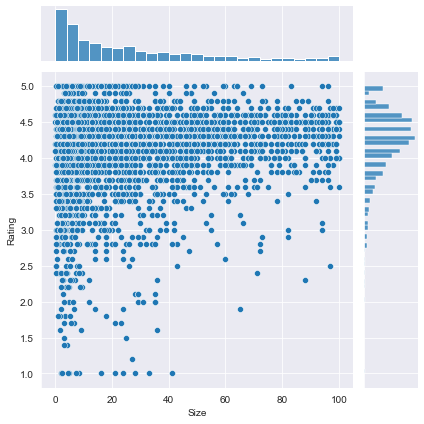

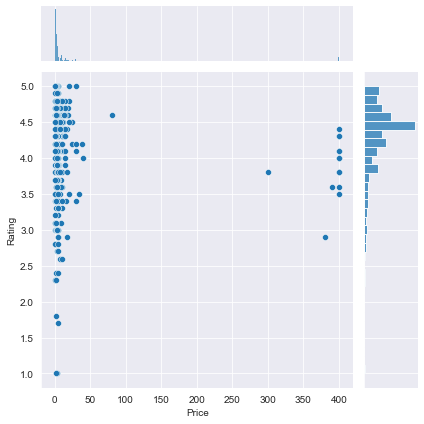

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Selecionando as linhas em que os valores de 'Rating' e 'Size' existem (n√£o s√£o nulos) 
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps["Size"].isnull())]

# 'Subsetting' para categorias com pelo menos 250 aplicativos
large_categories = apps_with_size_and_rating_present.groupby(["Category"]).filter(lambda x: len(x) >= 250)

# Plotando Size vs. Rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Selecionando os apps no qual seu 'Type' √© 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']


# Plotando Price vs. Rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Rela√ß√£o entre categoria e pre√ßo dos aplicativos
<p>Como as empresas e os desenvolvedores devem sobreviver? Quais estrat√©gias de monetiza√ß√£o as empresas podem utilizar para maximizar o lucro? Os custos dos aplicativos s√£o amplamente baseados em recursos, complexidade e plataforma.</p>
<p>H√° muitos fatores a serem considerados ao selecionar a estrat√©gia de pre√ßos certa para seu aplicativo m√≥vel. √â importante considerar a disposi√ß√£o do seu cliente em pagar pelo seu aplicativo. Um pre√ßo errado pode "quebrar" o neg√≥cio antes mesmo do download acontecer. Clientes em potencial podem ficar desanimados com o que consideram um custo absurdo, podem excluir um aplicativo que baixaram depois de receber muitos an√∫ncios ou simplesmente n√£o receber o valor do dinheiro.</p>
<p>Diferentes categorias exigem diferentes faixas de pre√ßo. Alguns aplicativos simples e usados diariamente, como o aplicativo da calculadora, provavelmente deveriam ser mantidos gratuitos. No entanto, faria sentido cobrar por um aplicativo m√©dico altamente especializado que diagnostica pacientes diab√©ticos. Abaixo, vemos que os aplicativos <em>Medical and Family</em> s√£o os mais caros. Alguns aplicativos m√©dicos chegam a custar at√© \$80! J√° os aplicativos de jogos costumam ter pre√ßos razo√°veis - abaixo de \$20.</p>

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         üíé I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢  399.99

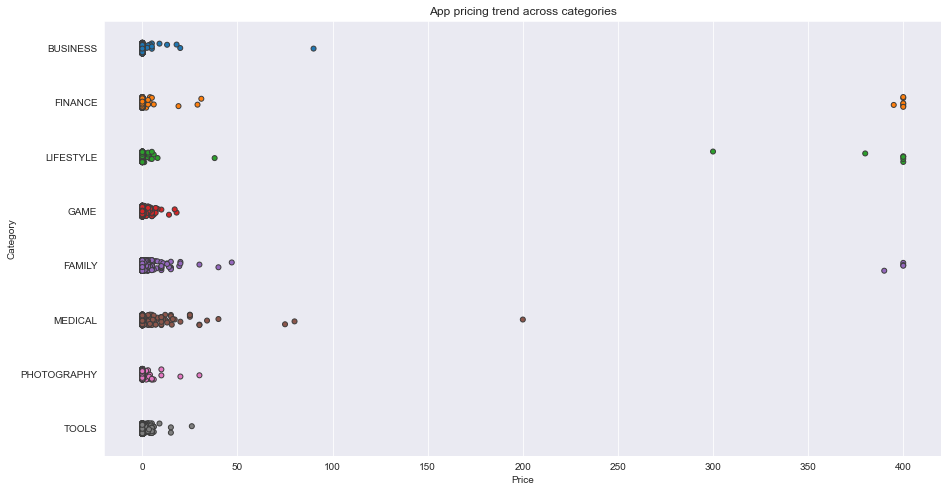

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecionando algumas categorias populares de aplicativos
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examinando a tend√™ncia de pre√ßo plotando 'Price' vs. 'Category'
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps que possui pre√ßo superior a $200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 8.Filtrando aplicativos "lixo" (junk apps)
<p>Parece que muitos dos aplicativos realmente caros s√£o aplicativos "lixo". Ou seja, aplicativos que realmente n√£o t√™m um prop√≥sito. Alguns desenvolvedores de aplicativos podem criar um aplicativo chamado <em>I Am Rich Premium</em> ou <em>app mais caro de todos (H)</em> apenas por divers√£o ou para testar suas habilidades em desenvolvimento de aplicativos. Alguns desenvolvedores at√© fazem isso com inten√ß√£o maliciosa e tentam ganhar dinheiro esperando que as pessoas cliquem acidentalmente em comprar em seu aplicativo na loja.</p>
<p>Vamos filtrar esses "junk apps" e refazer nossa visualiza√ß√£o.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

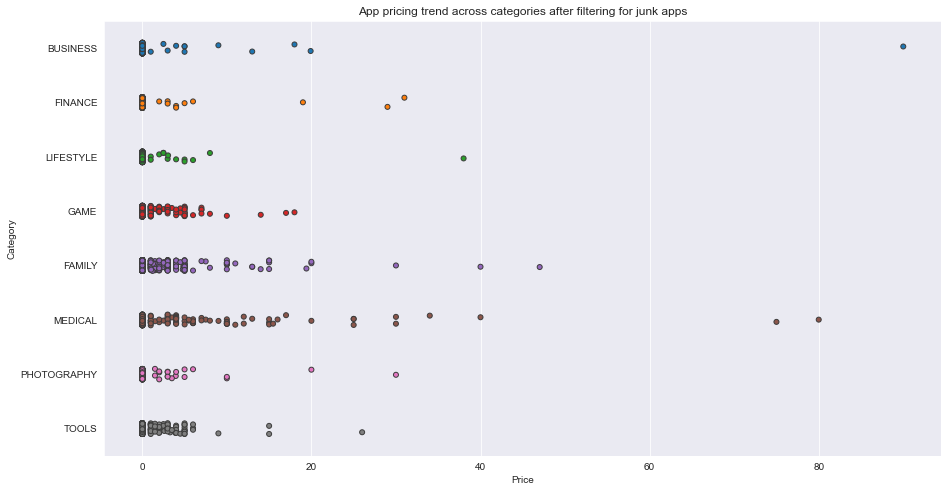

In [8]:
# Selecionando apps com pre√ßo abaixo de $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examinando 'Price' vs. 'Category' com os aplicativos aut√™nticos (apps_under 100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularidade dos aplicativos pagos vs. aplicativos gratuitos
<p>Para aplicativos na Play Store hoje, existem cinco tipos de estrat√©gias de precifica√ß√£o: gr√°tis, freemium, pago, "paymium" e assinatura. Vamos focar apenas em aplicativos gratuitos e pagos. Algumas caracter√≠sticas dos aplicativos gratuitos s√£o:</p>
<ul>
<li>Gratuito para download.</li>
<li>Sua principal fonte de renda geralmente vem de an√∫ncios.</li>
<li>Muitas vezes criado por empresas que possuem outros produtos e o aplicativo serve como uma extens√£o desses produtos.</li>
<li>Pode servir como uma ferramenta para reten√ß√£o de clientes, comunica√ß√£o e atendimento ao cliente.</li>
</ul>
<p>Algumas caracter√≠sticas dos aplicativos pagos s√£o:</p>
<ul>
<li>Usu√°rios s√£o solicitados a pagar uma vez pelo aplicativo para fazer o download e us√°-lo.</li>
<li>O usu√°rio n√£o consegue conhecer a fundo o aplicativo antes de compr√°-lo.</li>
</ul>
<p>Aplicativos pagos s√£o baixados tanto quanto aplicativos gratuitos? Acontece que os aplicativos pagos t√™m um n√∫mero relativamente menor de instala√ß√µes do que os aplicativos gratuitos, embora a diferen√ßa n√£o seja t√£o gritante quanto possa parecer.</p>

In [9]:
trace0 = go.Box(
    # Dados para aplicativos pagos
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Dados para aplicativos gratuitos
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Adicionando trace0 e trace1 √† lista para plotagem
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. An√°lise de Sentimento das avalia√ß√µes dos usu√°rios
<p>A minera√ß√£o de dados de avalia√ß√µes de usu√°rios para determinar como as pessoas se sentem em rela√ß√£o ao seu produto, marca ou servi√ßo pode ser feita usando uma t√©cnica chamada An√°lise de Sentimento. As avalia√ß√µes dos usu√°rios podem ser analisadas para identificar se o "humor" √© positivo, negativo ou neutro em rela√ß√£o a esse aplicativo. Por exemplo, palavras positivas em uma avalia√ß√£o  podem incluir palavras como 'incr√≠vel', 'amig√°vel', 'bom', '√≥timo' e 'amor'. Palavras negativas podem ser palavras como 'malware', '√≥dio', 'problema', 'reembolso' e 'incompetente'.</p>
<p>Ao tra√ßar pontua√ß√µes de polaridade de sentimento de avalia√ß√µes para aplicativos pagos e gratuitos observamos que aplicativos gratuitos recebem muitos coment√°rios severos, conforme indicado pelos valores discrepantes no eixo 'y' negativo. As avalia√ß√µes de aplicativos pagos parecem nunca ser extremamente negativas. Isso pode indicar algo sobre a qualidade do aplicativo, ou seja, os aplicativos pagos s√£o de qualidade superior aos aplicativos gratuitos em m√©dia. A pontua√ß√£o m√©dia de polaridade para aplicativos pagos √© um pouco maior do que para aplicativos gratuitos, confirmando ent√£o nossa observa√ß√£o anterior.</p>
<p>Neste notebook, analisamos mais de dez mil aplicativos da Google Play Store. Podemos utilizar essas descobertas para informar nossas decis√µes, caso desejemos criar um aplicativo por conta pr√≥pria.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

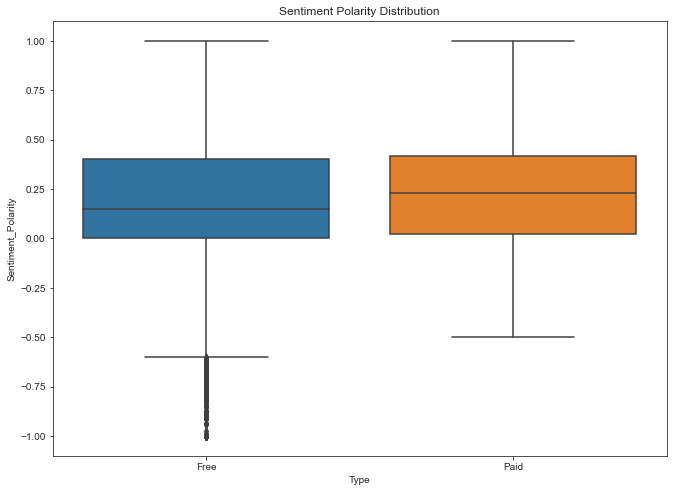

In [10]:
# Carregando user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Juntando os dois dataframes
merged_df = apps.merge(reviews_df)

# Retirando os valores "NA" das colunas Sentiment e Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Polaridade de sentimento sobre avalia√ß√£o do usu√°rio para aplicativos "Paid" vs. "Free"
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')